In [44]:
# %pip install openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.metrics import r2_score 
from scipy.optimize import differential_evolution, minimize

In [45]:
df = pd.read_excel("../dados/Semibat_convertido_clean.xlsx")
df.columns = ['Ester_t','Ester_gl','Ester_mM','Amox_t','Amox_gl','Amox_mM','APA_t','APA_gl','APA_mM','POHPG_t','POHPG_gl','POHPG_mM']
df

,Ester_t,Ester_gl,Ester_mM,Amox_t,Amox_gl,Amox_mM,APA_t,APA_gl,APA_mM,POHPG_t,POHPG_gl,POHPG_mM
0,9.859813,6.133333,34.040034,14.719626,0.883436,2.417722,10.163551,15.409471,71.254373,15.070093,-0.024540,-0.146805
1,20.017523,5.866667,32.560033,29.906542,1.262440,3.454954,19.976636,15.186630,70.223941,29.789720,0.368098,2.202071
2,29.827687,5.733333,31.820032,39.953271,1.546012,4.231013,30.140187,15.008357,69.399596,39.953271,0.417178,2.495680
3,39.986371,5.511111,30.586697,59.929907,2.110429,5.775669,39.953271,15.498607,71.666546,59.929907,0.736196,4.404142
4,50.145055,5.288889,29.353363,85.864486,2.797546,7.656119,49.766355,15.320334,70.842200,86.214953,0.073620,0.440414
5,59.973715,6.000000,33.300033,103.037383,3.067485,8.394868,59.929907,15.186630,70.223941,103.037383,1.079755,6.459408
6,70.132399,5.777778,32.066699,112.149533,3.042945,8.327709,69.742991,15.008357,69.399596,111.799065,0.858896,5.138165
7,80.292056,5.600000,31.080031,141.939252,3.558282,9.738047,79.906542,15.498607,71.666546,142.289720,0.809816,4.844556
8,90.103193,5.511111,30.586697,155.257009,3.975460,10.879749,90.070093,15.364903,71.048287,155.257009,1.055215,6.312603
9,100.261877,5.288889,29.353363,181.191589,4.073620,11.148384,100.233645,15.186630,70.223941,181.542056,1.128834,6.753017


In [46]:
CAB_medida  = df.loc[:,'Ester_mM'].dropna().to_numpy()
CAN_medida = df.loc[:,'Amox_mM'].dropna().to_numpy()
CNH_medida = df.loc[:,'APA_mM'].dropna().to_numpy()
CAOH_medida = df.loc[:,'POHPG_mM'].dropna().to_numpy()
t_cab = df.loc[:,'Ester_t'].dropna().to_numpy().round(0)
t_can = df.loc[:,'Amox_t'].dropna().to_numpy().round(0)
t_cnh = df.loc[:,'APA_t'].dropna().to_numpy().round(0)
t_caoh = df.loc[:,'POHPG_t'].dropna().to_numpy().round(0)

tempo_substratos = t_cab
tempo_produtos = t_can

CAB_medida_t = np.hstack([CAB_medida.reshape(-1,1),t_cab.reshape(-1,1)])
CAN_medida_t = np.hstack([CAN_medida.reshape(-1,1),t_can.reshape(-1,1)])
CNH_medida_t = np.hstack([CNH_medida.reshape(-1,1),t_cab.reshape(-1,1)])
CAOH_medida_t = np.hstack([CAOH_medida.reshape(-1,1),t_can.reshape(-1,1)])

medidas_exp_list = [CAB_medida_t,CAN_medida_t,CNH_medida_t,CAOH_medida_t]
t_total = np.unique(np.sort(np.hstack([t_can,t_cab])))


In [47]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


In [48]:
def enzymic_amox(t, y, kcat1, kcat2, Km1, Km2, Tmax, Ken, kAB, kAN, kAOH, kNH):
    FAB = 0
    FNH = 0 

    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    Cez = 1  # Assuming a constant value for Cez if not provided

    # Consumo de ester
    VAB = (kcat1 * CAB * Cez) / ((Km1 * (1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2 * CAN * Cez) / ((Km2 * (1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X = CNH / (Ken + CNH)
    
    # Sintese enzimatica
    VS = VAB * Tmax * X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = (-(VS - VAN) - (Vh1 + VAN)) + FAB 
    
    # C. amox
    dy[1] = VS - VAN                        
    
    # C. 6-apa
    dy[2] = -(VS - VAN) + FNH                
    
    # C. POHPG
    dy[3] = Vh1 + VAN
    
    return dy


In [49]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


In [50]:
kcat1        = 0.181
kcat2        = 0.395
Km1          = 5.449
Km2          = 1.694
Tmax         = 0.824
Ken          = 7.947
kAB          = 0.682
kAN          = 1.989
kAOH         = 9.856
kNH          = 9.763

P = np.zeros(10)
P[0]   = kcat1    
P[1]   = kcat2    
P[2]   = Km1      
P[3]   = Km2      
P[4]   = Tmax     
P[5]   = Ken      
P[6]   = kAB      
P[7]   = kAN      
P[8]   = kAOH     
P[9]  = kNH 
Np = len(P)



In [51]:
def ode15s_amox_fed(P,t):
    fed_t = np.unique(np.sort(np.hstack([fed_ab[0],fed_nh[0]])))
    CI_ode = np.array([CAB_medida[0],CAN_medida[0],CNH_medida[0],CAOH_medida[0]])
    all_t = []
    for i,fed in enumerate(fed_t):
        all_t.insert(i,[])
        count = 0
        for p in t:
            all_t[i].append(p)
            count += 1
            if p == fed:
                break
        t = t[count-1:]
    all_t.append(t)

    final_Y = np.zeros([4,1])
    for t in all_t:
        Y = scipy.integrate.solve_ivp(enzymic_amox,t_span=(t[0],t[-1]),t_eval=t,y0=CI_ode,method='BDF',args=P)
        Y = Y.y
        CI_ode = Y[:,-1]
        if t[-1] in fed_ab[0]:
            CI_ode[0] = fed_ab[1][list(fed_ab[0]).index(t[-1])]
        if t[-1] in fed_nh[0]:
            CI_ode[2] = fed_nh[1][list(fed_nh[0]).index(t[-1])]
        final_Y = np.hstack([final_Y,Y[:,:-1]]) 
    final_Y = np.hstack([final_Y,Y[:,-1].reshape(-1,1)])
    final_Y = np.delete(final_Y,0,1)
    return final_Y

In [52]:
def calculate_error(model_matrix, experimental_data_list):
    # Extract model time points
    model_time = model_matrix[:, -1]
    total_error = 0
    for var_index, experimental_data in enumerate(experimental_data_list):
        # Extract variable model data
        model_variable_data = model_matrix[:, var_index]
        # Match time points between model and experimental data
        exp_time = experimental_data[:, -1]
        exp_values = experimental_data[:, 0]

        for t, exp_value in zip(exp_time, exp_values):
            if not np.isnan(exp_value):  # Skip NaN values in experimental data
                # Find corresponding model value at time t
                model_value = model_variable_data[model_time == t]
                if model_value.size > 0:  # If there's a matching time point
                    total_error += (exp_value - model_value[0]) ** 2
    print(total_error,end="\r")
    return total_error

In [53]:
def objective_function(params):
    kcat1, kcat2, Km1, Km2, Tmax, Ken, kAB, kAN, kAOH, kNH = params
    record.append(params)
    sol = ode15s_amox_fed(params,t_total)
    model_output = sol.T

    model_output = np.hstack([model_output,t_total.reshape(-1,1)])
    return calculate_error(model_output,medidas_exp_list)


In [65]:
method = 'L-BFGS-B'
options = {'maxiter':200}
record = []
bounds = [(0.001, None) for _ in range(len(P))]

result = minimize(objective_function, P, method=method,bounds=bounds,options=options)
record = np.array(record)
# Optimized parameters
optimized_parameters = result.x
print("Optimized Parameters:", optimized_parameters)
P_new = optimized_parameters

Optimized Parameters: [ 0.13075618  2.40060879  3.40377853  1.8936429   0.67241546  7.97567244
  0.02295049  6.43220718 10.29973174  9.76617731]


kcat1 0.1307561763069037
kcat2 2.4006087873111506
Km1 3.4037785318913114
Km2 1.8936428989109428
Tmax 0.6724154576772459
Ken 7.9756724390668055
kAB 0.02295049463945236
kAN 6.432207175967265
kAOH 10.299731738861908
kNH 9.76617730521308


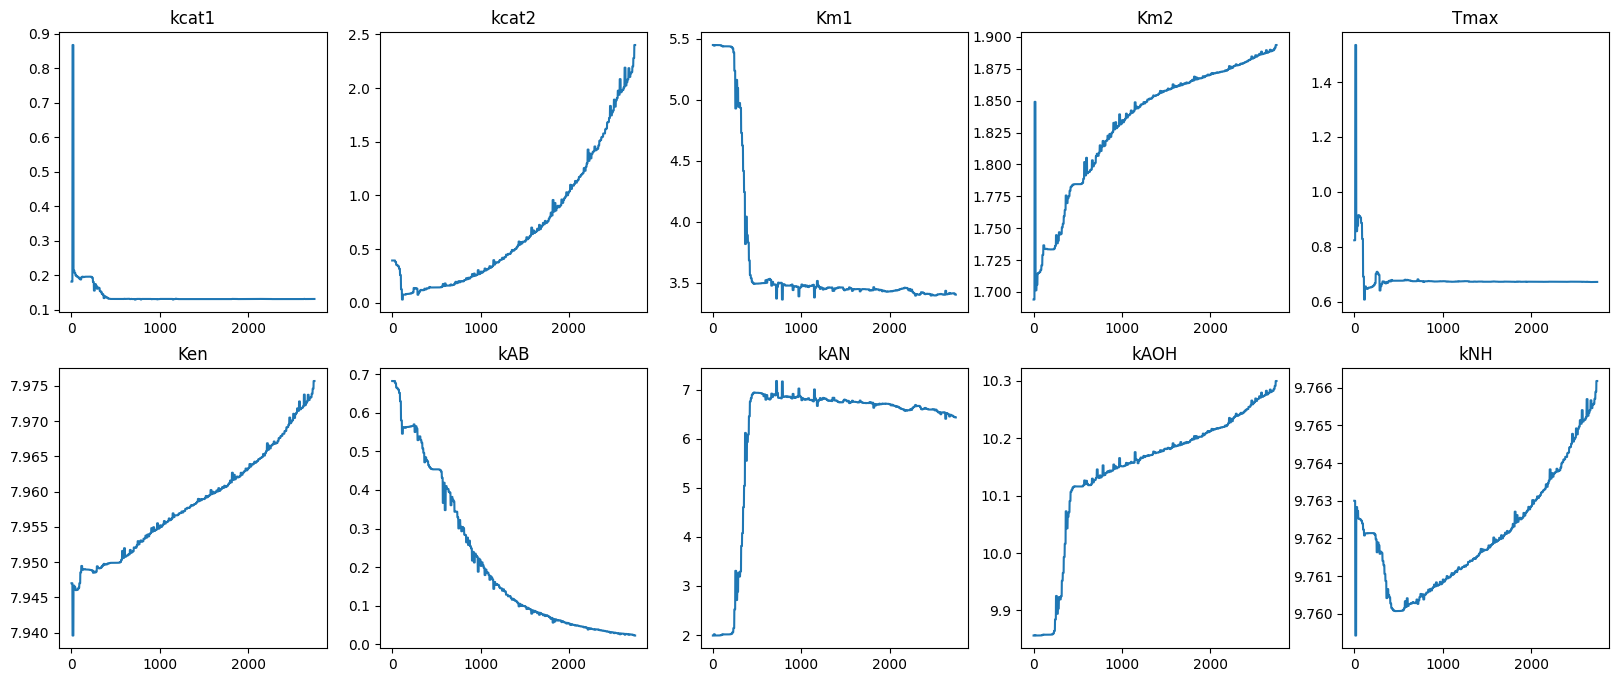

In [74]:
fig,ax = plt.subplots(2,5,figsize=[20,8])
ax = ax.flatten()
labels = ['kcat1',
'kcat2',
'Km1',
'Km2',  
'Tmax', 
'Ken',  
'kAB',  
'kAN',  
'kAOH', 
'kNH']
N = record.shape[0]
for idx,g in enumerate(ax):
    g.plot(record[:,idx])
    g.set_title(labels[idx])
    print(labels[idx],P_new[idx])
fig.savefig(f"../results/{method}_model_1/{method}_evo.png",dpi=400)

In [75]:
sol = ode15s_amox_fed(P_new,t_total)
pidx = np.isin(t_total, tempo_produtos)
sidx = np.isin(t_total, tempo_substratos)
CAB  = sol[0][sidx]
CAN  = sol[1][pidx] 
CNH  = sol[2][sidx]
CAOH = sol[3][pidx]
t_p = t_total[pidx]
t_s = t_total[sidx]


In [76]:
results_dir = 'results/L_BFGS_B_result'

names = ['Ester','6-APA','AMOX','POHPG']
medidas = [
    [CAB_medida,CAB],
    [CNH_medida,CNH],
    [CAN_medida,CAN],
    [CAOH_medida,CAOH]
]
times = [tempo_substratos, tempo_substratos,tempo_produtos,tempo_produtos]

for name, medida, t in zip(names, medidas,times):
    plt.plot(t, medida[0], 'ob', label='Medida')
    plt.plot(t, medida[1], '-ok', label='Estimada')
    plt.xlabel('Tempo (h)')
    plt.ylabel(f"Concentração de {name} (g/L)")
    plt.legend() # Adjust legend position
    plt.title(f"Concentração de {name} ao Longo do Tempo R={r2_score(medida[0],medida[1])}")
    plt.savefig(f"{results_dir}/{name}_estimate.png", dpi=300)
    plt.close()  # Close the figure to release memory


Text(0, 0.5, 'mM')

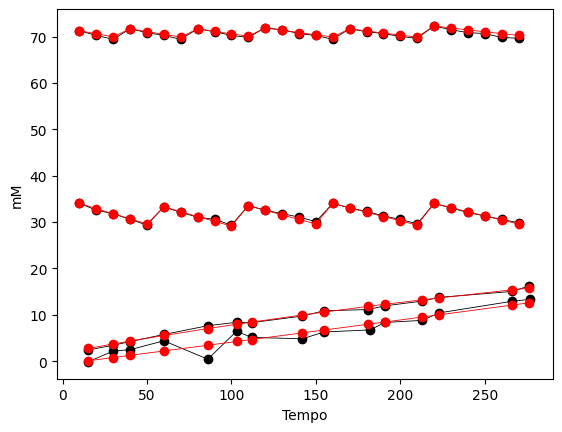

In [69]:

fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t_s, CAB,'-or',linewidth=0.6)
plt.plot(t_p, CAN,'-or',linewidth=0.6)
plt.plot(t_s, CNH,'-or',linewidth=0.6)
plt.plot(t_p, CAOH,'-or',linewidth=0.6)
plt.xlabel('Tempo')
plt.ylabel('mM')

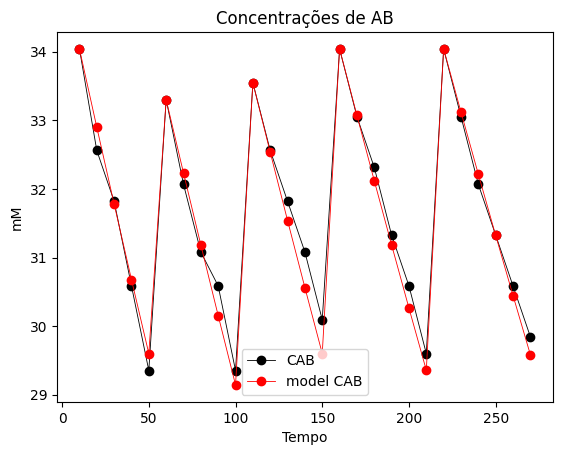

In [70]:
fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_s, CAB,'-or',linewidth=0.6)
plt.title(f'Concentrações de AB')
plt.legend(['CAB','model CAB'])
plt.xlabel('Tempo')
plt.ylabel('mM');

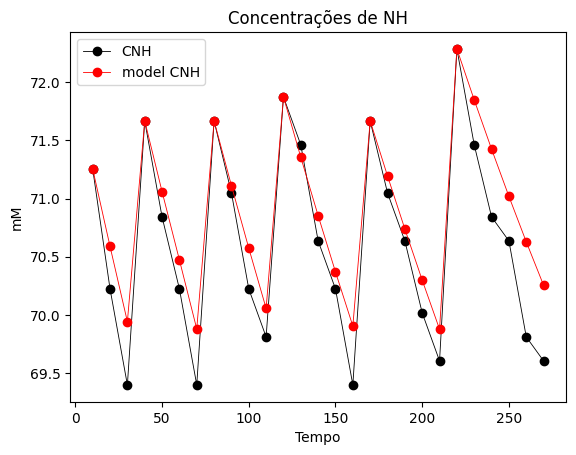

In [71]:
fig = plt.figure()
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_s, CNH,'-or',linewidth=0.6)
plt.title(f'Concentrações de NH')
plt.legend(['CNH','model CNH']);
plt.xlabel('Tempo')
plt.ylabel('mM');

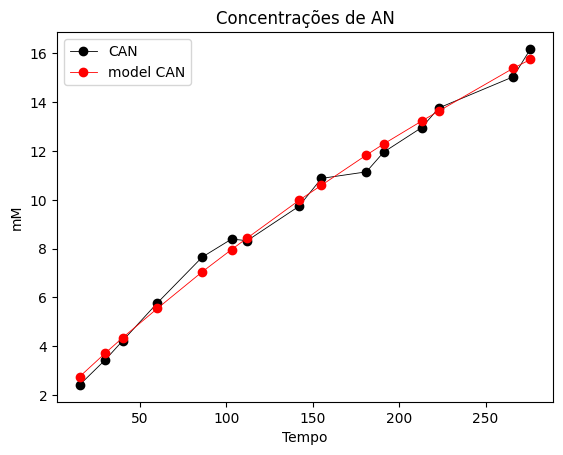

In [72]:
fig = plt.figure()

plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_p, CAN,'-or',linewidth=0.6)
plt.title(f'Concentrações de AN')
plt.legend(['CAN','model CAN']);
plt.xlabel('Tempo')
plt.ylabel('mM');

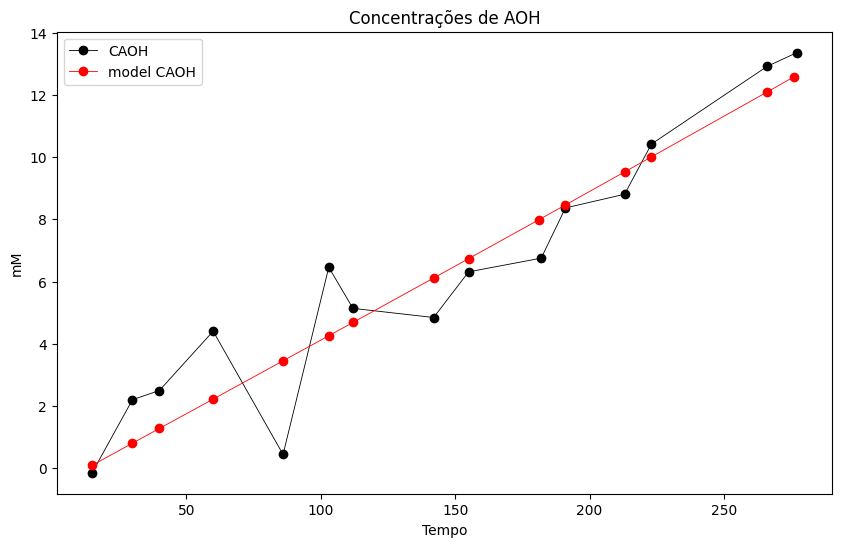

In [73]:
fig = plt.figure(figsize=(10,6))

plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t_p, CAOH,'-or',linewidth=0.6)
plt.title(f'Concentrações de AOH')
plt.legend(['CAOH','model CAOH'])
plt.xlabel('Tempo')
plt.ylabel('mM');